<a href="https://colab.research.google.com/github/hbhb0311/LikelionStudy/blob/main/1.DL_basic/3.Tensorflow_binaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이항 분류

## 와인 데이터

### 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [3]:
red.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [4]:
white.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [5]:
# 각자의 데이터에 type 변수를 설정해 추가하기
red['type'] = 0
white['type'] = 1

In [6]:
# 데이터 합쳐주기 
wine = pd.concat([red, white])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


### 시각화를 통해 데이터 확인

In [7]:
import matplotlib.pyplot as plt

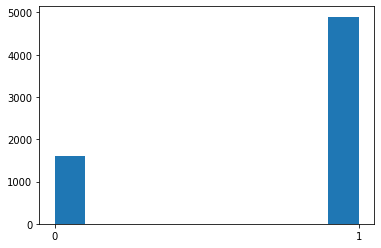

In [8]:
plt.hist(wine['type'])
plt.xticks([0,1])
plt.show()

In [9]:
wine['type'].value_counts()
# white와 red의 비율이 3:1 정도인 것을 알 수 있음

1    4898
0    1599
Name: type, dtype: int64

### 데이터 정제

#### 데이터 정규화

In [10]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
# 정규화는 모든 값을 0과 1사이로 만들어 주는 것을 의미

wine_norm.head(2)
type(wine_norm)

pandas.core.frame.DataFrame

#### 섞고 array로 만들기

In [11]:
# 데이터를 섞어주고, array 로 만들어줌

wine_shuffle = wine_norm.sample(frac = 1)
# frac은 지정된 비율만큼 행을 랜덤하게 뽑아 새로운 데이터 프레임을 만들겠다는 뜻

import numpy as np
wine_np = np.array(wine_shuffle)
wine_np[:5]

array([[0.25619835, 0.10666667, 0.19879518, 0.06441718, 0.05149502,
        0.05208333, 0.28801843, 0.12512049, 0.41860465, 0.23595506,
        0.39130435, 0.5       , 1.        ],
       [0.20661157, 0.20666667, 0.21084337, 0.08128834, 0.05149502,
        0.28298611, 0.58525346, 0.13475998, 0.31007752, 0.24719101,
        0.30434783, 0.33333333, 1.        ],
       [0.31404959, 0.08      , 0.18072289, 0.20858896, 0.07807309,
        0.18055556, 0.47580645, 0.22922691, 0.3255814 , 0.13483146,
        0.13043478, 0.83333333, 1.        ],
       [0.23140496, 0.12666667, 0.24698795, 0.0107362 , 0.07142857,
        0.05208333, 0.31336406, 0.15403894, 0.54263566, 0.14044944,
        0.28985507, 0.5       , 1.        ],
       [0.29752066, 0.24666667, 0.19277108, 0.09969325, 0.05813953,
        0.05555556, 0.25576037, 0.17524581, 0.46511628, 0.10674157,
        0.34782609, 0.16666667, 1.        ]])

#### train vs test

In [12]:
import tensorflow as tf

train_idx = int(len(wine_np) * 0.8)

train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx: , :-1], wine_np[train_idx: , -1]

In [13]:
train_X[0]

array([0.25619835, 0.10666667, 0.19879518, 0.06441718, 0.05149502,
       0.05208333, 0.28801843, 0.12512049, 0.41860465, 0.23595506,
       0.39130435, 0.5       ])

In [14]:
test_X[0]

array([0.37190083, 0.08      , 0.29518072, 0.01687117, 0.05149502,
       0.11458333, 0.37557604, 0.12897629, 0.25581395, 0.08426966,
       0.30434783, 0.33333333])

In [15]:
train_Y[0]

1.0

In [16]:
test_Y[0]

1.0

#### one-hot encoding

In [17]:
# red=0, white=1 로 하면 white가 더 중요한 정보라고 인지할 수 있음
# 따라서 같은 형식으로 변경해줌
# num_classes는 정답 클래스의 개수 ; white, red 2개라서 2로 입력
train_Y = tf.keras.utils.to_categorical(train_Y, 2)
test_Y = tf.keras.utils.to_categorical(test_Y, 2)
train_Y[0] # 1을 뜻함 , white

array([0., 1.], dtype=float32)

In [18]:
test_Y[0] # 0을 뜻함, red

array([0., 1.], dtype=float32)

### 분류 모델 설정

In [19]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(48, 'relu'),
                             tf.keras.layers.Dense(24, 'relu'),
                             tf.keras.layers.Dense(12, 'relu'),
                             tf.keras.layers.Dense(2, 'softmax')
])
# 마지막 층의 뉴런의 개수는 2, 출력 값의 차원이 2차원이라서 ? [1,0] 이런 식으로...
# softmax : max함수의 좀 더 soft한 버전이라고 생각하면 됨, 두가지의 결과 값중 조금 더 확률 높은 값을 결정값으로 확정짓는 것

### 모델 학습시킬 준비

In [20]:
model.compile(tf.keras.optimizers.Adam(lr = 0.07), loss = 'categorical_crossentropy', metrics=['accuracy'])
# metrics 는 이 값도 같이 출력해달라는 의미 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [21]:
history = model.fit(train_X, train_Y, epochs = 25, batch_size = 32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 4s 7ms/step - loss: 0.1673 - accuracy: 0.9269 - val_loss: 0.0552 - val_accuracy: 0.9831
Epoch 2/25
122/122 [==============================] - 1s 5ms/step - loss: 0.0636 - accuracy: 0.9813 - val_loss: 0.0763 - val_accuracy: 0.9823
Epoch 3/25
122/122 [==============================] - 1s 5ms/step - loss: 0.0564 - accuracy: 0.9846 - val_loss: 0.0640 - val_accuracy: 0.9885
Epoch 4/25
122/122 [==============================] - 1s 5ms/step - loss: 0.0485 - accuracy: 0.9874 - val_loss: 0.0563 - val_accuracy: 0.9862
Epoch 5/25
122/122 [==============================] - 1s 5ms/step - loss: 0.0440 - accuracy: 0.9887 - val_loss: 0.0576 - val_accuracy: 0.9869
Epoch 6/25
122/122 [==============================] - 1s 5ms/step - loss: 0.0415 - accuracy: 0.9905 - val_loss: 0.0752 - val_accuracy: 0.9823
Epoch 7/25
122/122 [==============================] - 1s 5ms/step - loss: 0.0565 - accuracy: 0.9854 - val_loss: 0.0398 - val_accuracy: 0.9877
Epoch 

In [22]:
model.summary()
# 이걸 쓰려면 fit을 하고 쓰든지, 처음 층을 설계할때 input_shape을 설정해줘야함

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


### loss, accuracy 시각화

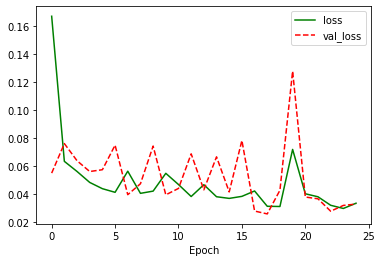

In [23]:
plt.plot(history.history['loss'], 'g-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

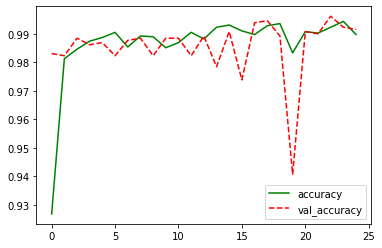

In [24]:
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'val_accuracy')
plt.legend()
plt.show()

### 분류모델 평가

In [25]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 3ms/step - loss: 0.0820 - accuracy: 0.9923


[0.08204236626625061, 0.9923076629638672]